# Narrative Analytics and Experimentation 


### Direct marketing campaign to increase term deposit

Banco de ABC (pseudonym) is a Portuguese multinational investment bank and financial services company based in Lisbon. Currently, the bank is experiencing revenue decline. After close examination, analysts at Banco de ABC have discovered that the lack of deposits from clients has strong correlations to revenue decline. In general, deposits enable banks to influence the money supply by investing in a higher financial gain. Also, frequent interaction with clients would increase the opportunity to advertise financial products, which in turn would boost revenue. 

In hopes of increasing term deposits, Banco de ABC has launched a direct marketing campaign based on phone calls. Sales representatives were given a script template to follow when delivering the calls.  

We will analyze the outcomes of this campaign. Then, a proposal for an A/B test plan will be crafted. 


### Exploring the Data

In this proposal, we will be examining a [bank marketing](https://www.kaggle.com/henriqueyamahata/bank-marketing) report released by Banco de ABC's marketing team. Below, we will explore the dataset by preforming decriptive analysis. 

In [1]:
# Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import data

data = pd.read_csv('bank-additional-full.csv',sep=';')

# Rename columns 
data.rename(columns={'default':'credit_default',
                    'housing':'housing_loan',
                    'loan':'personal_loan',
                    'contact':'contact_type',
                    'durataion':'contact_duration (sec)',
                    'campaign':'num_contacted',
                    'pdays':'last_contacted (days)',
                    'y':'outcome'},inplace=True)

# Convert selected features to categorical type
columns_category = ['job','marital','education','credit_default',
                   'housing_loan','personal_loan','contact_type',
                   'month','day_of_week','poutcome','outcome']
data[columns_category] = data[columns_category].astype('str')
data[columns_category] = data[columns_category].astype('category')

data.head()

,age,job,marital,education,credit_default,housing_loan,personal_loan,contact_type,month,day_of_week,...,num_contacted,last_contacted (days),previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 21 attributes in this dataset. The first 7 columns consists of clients social, economical, and loan information. Then, the rest of the columns contains related data to the marketing campaign. <br>

__Client__: age, job, marital, education, default status, housing, and loan <br>

__Campaign__: last contact type, last contact month of year, last contact day of the week, and last contact duration <br>

__Others__: number of contacts performed in current campaign, number of days that passed by after the client was last contacted, number of contacts performed before this campaign, outcome of previous campaign, and whether a client has subscribed a term deposit

In [3]:
# Data statistics

data.describe(include='category')

,job,marital,education,credit_default,housing_loan,personal_loan,contact_type,month,day_of_week,poutcome,outcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In this marketing campaign, sales representative contacted 41,188 clients. Among those clients, many worked as administrators, married, and had a university degree.  Majority of clients did not possess credit in default or personal loans. Meanwhile, approximately have of the clients has records of a housing loan. 

Next, let's explore the campaign data.

Text(0.5,1,'Day of the Week Contacted')

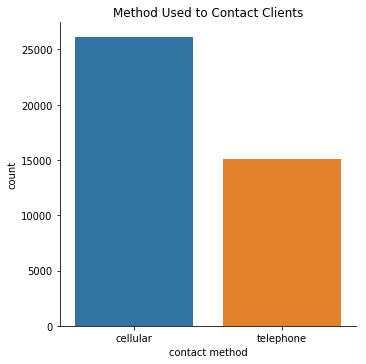

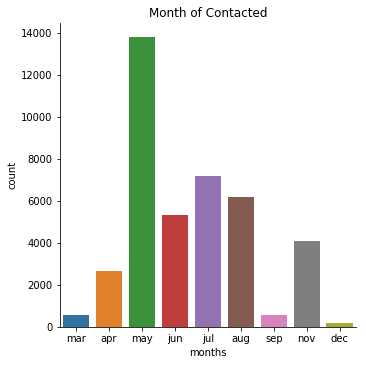

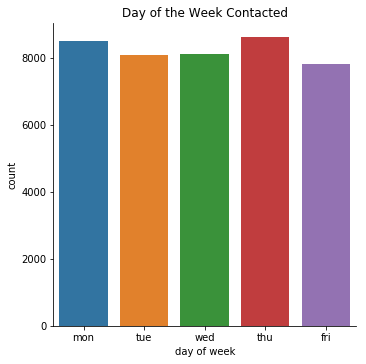

In [5]:
# Plot campaign variables 

sns.catplot(x='contact_type',kind='count',data=data)
plt.xlabel('contact method')
plt.title('Method Used to Contact Clients')


order = ['mar','apr','may','jun','jul','aug','sep','nov','dec']
sns.catplot(x='month',kind='count',data=data,order=order)
plt.xlabel('months')
plt.title('Month of Contacted')


order = ['mon','tue','wed','thu','fri']
sns.catplot(x='day_of_week',kind='count',data=data,order=order)
plt.xlabel('day of week')
plt.title('Day of the Week Contacted')


Clients were mainly contacted through their cellular phone number. Majority of the calls were made during summer months, especially in May from Monday to Friday. 

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Duration of Call (seconds)')

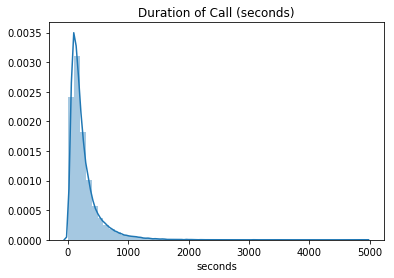

In [4]:
# Plot duration

sns.distplot(data.duration)
plt.xlabel('seconds')
plt.title('Duration of Call (seconds)')

Majority of calls lasted under 15 minutes. However, there appears to be multiple outliers on the right side of the tail, skewing the distribution to the right. Those outliers could have been clients who were interested in making a deposit. 

Let's explore the relationship between duration and outcomes. 

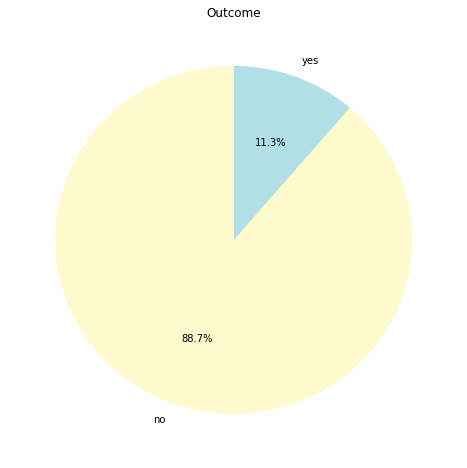

/Users/tsawaengsri/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Numbers of Time Contacted during the Campaign and Outcome')

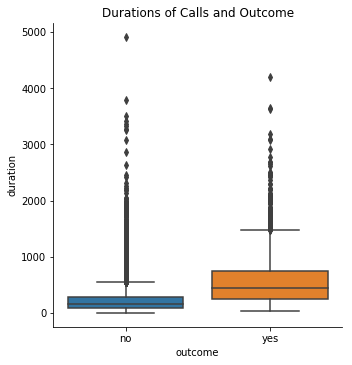

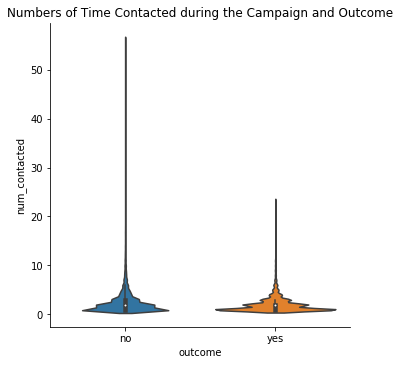

In [5]:
# Plot outcomes 

outcome = data['outcome'].value_counts()
outcome.index = ['no','yes']
labels =(np.array(outcome.index))
sizes = (np.array((outcome/outcome.sum())*100))
colors = ['lemonchiffon','powderblue']

plt.figure(figsize=(8,8))

plt.pie(sizes,labels=labels, colors=colors,autopct='%1.1f%%', 
        startangle=90)
plt.title("Outcome")
plt.show()

sns.catplot(x='outcome',y='duration',
            kind='box',dodge=False,data=data)
plt.title('Durations of Calls and Outcome')

sns.catplot(x='outcome',y='num_contacted',
            kind='violin',dodge=False,data=data)
plt.title('Numbers of Time Contacted during the Campaign and Outcome')

We can observe that this marketing campaign has not been successful. The data is highly skewed since only 11.3% of all clients have subscribed to a term deposit. According to the boxplot, clients who subscribed have a higher mean of call duration than those who responded no. The third graph shows that the numbers of times contacted during the campaign does not increase the probability of a successful client deposit subscription. 


### Motivation for the test 

Since call duration was a significant variable in a successful outcome, more information about these successful calls needed to be examined. 

The company gathered the top sales representatives performers to identify common traits that lead to favorable outcomes. At the meeting, the majority of sales representatives agreed that __personalization__ was a key to connecting with the client. Although following the fundamentals of the script, these representatives followed up with additional conversation openers given the client's data on hand. 

With the ultimate goal of increasing term deposit subscriptions, I propose cultivating a new script that features personalization in the conversation. 

We will test the hypothesis that scripts with personalized key notes, rather than the original script, will significantily increase  the amount of client subscribers.


### Rollout Plan 

The A/B test will be implemented over the course of 9 months. The sample will consist of current clients who have not been contacted by previous campaigns in the last 3 months. 

Since the baseline conversion rate is currently 11.3%, we will have the minimum detectable effect set at 10% with a 95% confidence interval. Thus, we will need a sample size of 12,000 per variation.

To counterbalance demographic variance, clients will be assigned pseudorandomly to the test or control group. In addition, half of sales representatives will follow the new script while the remaining representatives will carry out the original script. After every Friday, will switch to the alternative script. If the representative started with the new script this week, he or she will switch to the original script the following week and vise versa until the end of the study. 

If a client does not give a definitive response to a term subscription at the end of the call, sales representatives will conduct a follow up after 5 days. 

After 9 months of implementing the test, a benchmark will be set to measure the difference between the test and control group. If there is no difference, rollout will continue to carry out for the remaining 18 weeks. If there is a significant difference, we will conclude that the new script is effective and create a plan to implement our new practice for future marketing campaigns. 


### Evaluation Plan 

In order for the new script to be considered more effective than the original script, we will compare the rate of deposit subscriptions, using a threshold of a p-value of 0.05. Rate of deposit subscriptions is defined as the proportion of clients who has said yes to a term deposit. An additional metric that we will use is the sales rate of other financial products. If the client did not subscribe to a term deposit, but purchases another package, we will also deem that as a success. 

A downfall of this evaluation plan is not considering the variation of each sales respesentative's call delivery. Unlike an online A/B test to examine a web page layout, a campaign based on phone calls will have additional factors that are not controllable. Although sales representatives have scripts to follow, their tone or pitch of delivery may impact the mood of the conversation. The company can generate a pre-recorded messages. However, that lacks interaction and opportunity to personally connect with clients. 
